In [20]:
# Team Bean Burrito
'''
Gabrielle Guidote 40175182
Marie-Jose Castellanos 40168044
Amrit Sohpal 40176197
'''
# Assignment 1
# Abalone Dataset
# output file : abalone-performance.txt 

'\nGabrielle Guidote 40175182\nMarie-Jose Castellanos 40168044\nAmrit Sohpal 40176197\n'

In [21]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#4 a : DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#4 b : DT GridSearch
from sklearn.model_selection import GridSearchCV

#4 c: MLP
from sklearn.neural_network import MLPClassifier

# performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The Data sets

DATASET 1 :  ABALONE

In [22]:
# data regarding Abalones.contains features of physical description of abalones (length, diameter, weights, etc) and one of 3 possible values for their
# sex: M (male), F (female), I (infant). Given the physical features of the abalone, the goal is to predict their sex.
df = pd.read_csv("abalone.csv")
df.info()
df.head()
# All features are numerical. Only the classes are string. No changes necessary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


2. Plot the percentage of the instances in each output class and store the graphic in a file called penguin-classes.gif
/ abalone-classes.gif. This analysis of the dataset will allow you to determine if the classes are balanced.
Which metric is more appropriate to use to evaluate the performance. Be ready to discuss this at the demo.

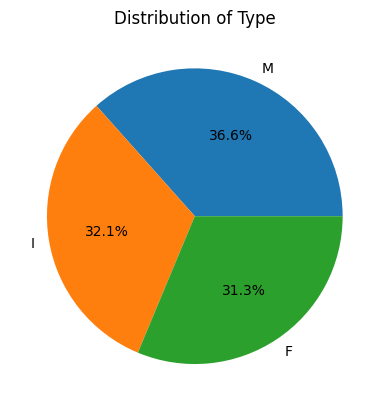

In [23]:
class_count = df['Type'].value_counts()
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%') # TODO : CAHNGE TYPE?? COLOR? HARD TO SEE SAVED IMAGE
plt.title('Distribution of Type')
# plt.show()

# save image (she said not .gif is ok)
plt.savefig('abalone-classes.png')

3. Split the dataset using train test split using the default parameter values

In [24]:
X =  df.loc[:, df.columns != 'Type']
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

4. Train and test 4 different classifiers:

# Base DT
(a) Base-DT: a Decision Tree with the default parameters. Show the decision tree graphically (for the
abalone dataset, you can restrict the tree depth for visualisation purposes)

In [25]:
# Training base DT
base_DT_d2 = DecisionTreeClassifier()
base_DT_d2.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5058139534883721, 0.9285714285714286, 'x[5] <= 0.148\ngini = 0.665\nsamples = 3132\nvalue = [970, 1010, 1152]'),
 Text(0.28924418604651164, 0.7857142857142857, 'x[7] <= 8.5\ngini = 0.535\nsamples = 1335\nvalue = [201, 837, 297]'),
 Text(0.14244186046511628, 0.6428571428571429, 'x[6] <= 0.128\ngini = 0.371\nsamples = 850\nvalue = [57, 658, 135]'),
 Text(0.0755813953488372, 0.5, 'x[5] <= 0.124\ngini = 0.275\nsamples = 613\nvalue = [22, 516, 75]'),
 Text(0.046511627906976744, 0.35714285714285715, 'x[1] <= 0.273\ngini = 0.268\nsamples = 607\nvalue = [22, 514, 71]'),
 Text(0.023255813953488372, 0.21428571428571427, 'x[5] <= 0.048\ngini = 0.313\nsamples = 313\nvalue = [7, 254, 52]'),
 Text(0.011627906976744186, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03488372093023256, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06976744186046512, 0.21428571428571427, 'x[2] <= 0.107\ngini = 0.211\nsamples = 294\nvalue = [15, 260, 19]'),
 Text(0.05813953488372093, 0.07142857142857142, '\n  (

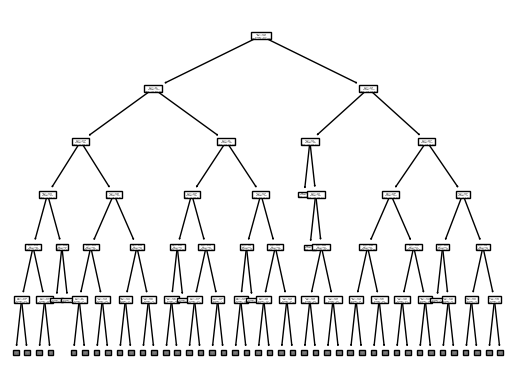

In [26]:
# Tree Visualization : https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html TODO : change figure size because its really tiny
tree.plot_tree(base_DT_d2, max_depth=5)

In [27]:
# Testing base DT
predictions2 = base_DT_d2.predict(X_test)

In [28]:
# Performance
print(confusion_matrix(y_test, predictions2))

print(classification_report(y_test, predictions2))

[[136  54 147]
 [ 50 223  59]
 [144  82 150]]
              precision    recall  f1-score   support

           F       0.41      0.40      0.41       337
           I       0.62      0.67      0.65       332
           M       0.42      0.40      0.41       376

    accuracy                           0.49      1045
   macro avg       0.48      0.49      0.49      1045
weighted avg       0.48      0.49      0.48      1045


In [29]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# TOP DT
(b) Top-DT: a better performing Decision Tree found using a gridsearch. The gridsearch will allow you
to find the best combination of hyper-parameters, as determined by the evaluation function that you
have determined in step (3) above. The hyper-parameters that you will experiment with are:
• criterion: gini or entropy
• max depth : 2 different values of your choice and ”None”
• min samples split: 3 different values of your choice
Show the decision tree graphically (for the abalone dataset, you can restrict the tree depth for visualisation purposes)

In [30]:
# Training top DT
parameters = {'criterion':['gini','entropy'], 'max_depth':[3,10,None], 'min_samples_split':[2,5,10]}

top_DT_d2 = DecisionTreeClassifier()
top_DT_d2 = GridSearchCV(top_DT_d2, parameters)

top_DT_d2.fit(X_train, y_train)

print(top_DT_d2.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [31]:
# Testing base DT
predictions = top_DT_d2.predict(X_test)

In [32]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[214  41  82]
 [ 40 244  48]
 [212  60 104]]
              precision    recall  f1-score   support

           F       0.46      0.64      0.53       337
           I       0.71      0.73      0.72       332
           M       0.44      0.28      0.34       376

    accuracy                           0.54      1045
   macro avg       0.54      0.55      0.53      1045
weighted avg       0.53      0.54      0.52      1045


In [33]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# BASE MLP
(c) Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters

In [34]:
# Training base MLP
base_MLP_d2 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd')
base_MLP_d2.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [ ]:
# Testing base MLP
predictions = base_MLP_d2.predict(X_test)

In [ ]:
# Performance TODO : VERY BAD AND HAS A WARNING>>> RECHECK STUFF
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[  0  29 295]
 [  0 222 119]
 [  0  57 323]]
              precision    recall  f1-score   support

           F       0.00      0.00      0.00       324
           I       0.72      0.65      0.68       341
           M       0.44      0.85      0.58       380

    accuracy                           0.52      1045
   macro avg       0.39      0.50      0.42      1045
weighted avg       0.39      0.52      0.43      1045


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# TOP MLP

(d) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following hyper-parameter values:
• activation function: sigmoid, tanh and relu
• 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers
with 10 + 10 + 10
• solver: adam and stochastic gradient descent

In [ ]:
# Training top MLP
parameters = {'activation': ['sigmoid', 'tanh', 'relu'],
    'hidden_layer_sizes': [(25, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']}


top_MLP_d2 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd')
top_MLP_d2 = GridSearchCV(top_MLP_d2, parameters)

top_MLP_d2.fit(X_train, y_train)

print(top_MLP_d2.best_params_)

In [ ]:
# Testing base MLP
predictions = top_MLP_d2.predict(X_test)

In [ ]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[198  36  78]
 [ 48 241  49]
 [218  67 110]]
              precision    recall  f1-score   support

           F       0.43      0.63      0.51       312
           I       0.70      0.71      0.71       338
           M       0.46      0.28      0.35       395

    accuracy                           0.53      1045
   macro avg       0.53      0.54      0.52      1045
weighted avg       0.53      0.53      0.51      1045


In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

6. Redo steps 4 & 5, 5 times for each model and append in the performance files:
(A) the average accuracy & the variance,
(B) average macro-average F1 & the variance,
(C) average weighted-average F1 & the variance.
Does the same model give you the same performance every time? is the standard deviation high? Be ready
to discuss this at the demo.